<a href="https://colab.research.google.com/github/PradhakshanaD/Image_Classification_using_Transfer_learning/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing the Kaggle library
!pip install kaggle

In [5]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:07<00:00, 157MB/s]
100% 812M/812M [00:07<00:00, 116MB/s]


In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images in the train folder: ', file_count)

Number of images in the train folder:  25000


In [11]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.4198.jpg', 'cat.11187.jpg', 'dog.11071.jpg', 'cat.10611.jpg', 'cat.3869.jpg', 'dog.4989.jpg', 'dog.4242.jpg', 'dog.1823.jpg', 'cat.10025.jpg', 'cat.4632.jpg', 'cat.8000.jpg', 'cat.4907.jpg', 'cat.9772.jpg', 'cat.8579.jpg', 'dog.11878.jpg', 'dog.1420.jpg', 'cat.12361.jpg', 'dog.4709.jpg', 'cat.1461.jpg', 'cat.3630.jpg', 'dog.11412.jpg', 'dog.6205.jpg', 'cat.1677.jpg', 'cat.8385.jpg', 'dog.6362.jpg', 'dog.8083.jpg', 'cat.10587.jpg', 'cat.2975.jpg', 'cat.9456.jpg', 'cat.2188.jpg', 'cat.1482.jpg', 'dog.9451.jpg', 'dog.6112.jpg', 'dog.3815.jpg', 'dog.5260.jpg', 'dog.2550.jpg', 'dog.10613.jpg', 'dog.7129.jpg', 'dog.11243.jpg', 'cat.8137.jpg', 'cat.7894.jpg', 'cat.1258.jpg', 'cat.106.jpg', 'dog.4867.jpg', 'cat.7543.jpg', 'cat.8978.jpg', 'dog.1191.jpg', 'dog.887.jpg', 'dog.11414.jpg', 'dog.8586.jpg', 'cat.3022.jpg', 'cat.9178.jpg', 'cat.8807.jpg', 'dog.5471.jpg', 'cat.7032.jpg', 'dog.1367.jpg', 'cat.5285.jpg', 'dog.10232.jpg', 'dog.4708.jpg', 'dog.5726.jpg', 'cat.9642.jpg', 'cat.2821.jpg

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

**Displaying the images of dogs and cats**

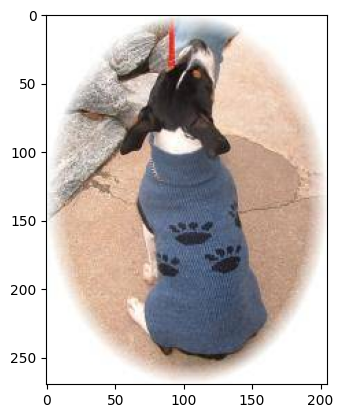

In [13]:
#display a dog image
img = mpimg.imread('/content/train/dog.4198.jpg')
imgplt = plt.imshow(img)
plt.show()

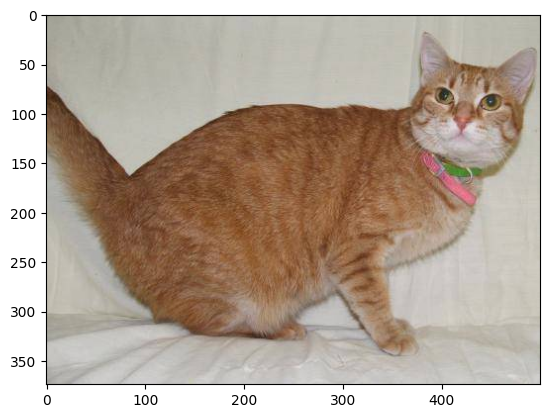

In [14]:
#display a cat image
img = mpimg.imread('/content/train/cat.10611.jpg')
imgplt = plt.imshow(img)
plt.show()

We can clearly see, that the scaling of the images are different. Hence, we would be standardizing the image scaling.

In [15]:
#count the number of dog and cat images in the train folder
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


**Resizing/rescaling the images**

In [17]:
#creating a directory for resized images
os.mkdir('/content/image_resized')

In [18]:
#resizing only the first 2000 images
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

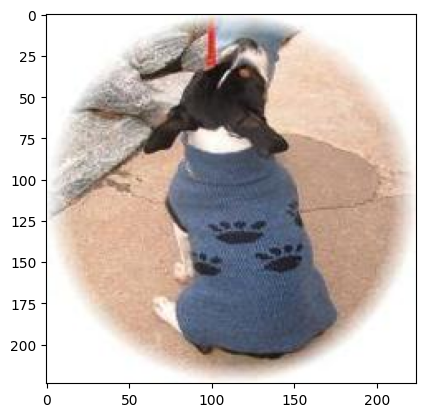

In [21]:
#displaying a resized dog image
img = mpimg.imread('/content/image_resized/dog.4198.jpg')
imgplt = plt.imshow(img)
plt.show()

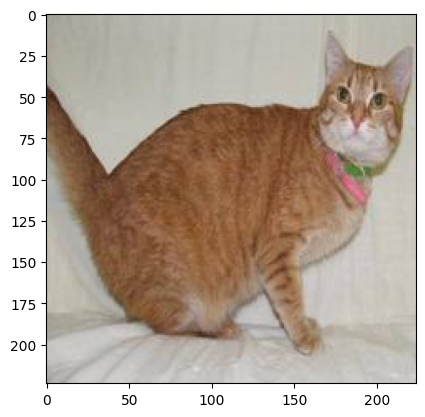

In [22]:
#displaying a resized cat image
img = mpimg.imread('/content/image_resized/cat.10611.jpg')
imgplt = plt.imshow(img)
plt.show()

**Labelling the images in image_resized folder**

0 --> Cat

1 --> Dog

In [26]:
#creating a 'for' loop to assign labels for a sampled set (2000) of images
filenames = os.listdir('/content/image_resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [27]:
#verifying the labels
print(filenames[0:5])
print(labels[0:5])

['dog.4198.jpg', 'cat.11187.jpg', 'dog.11071.jpg', 'cat.10611.jpg', 'cat.3869.jpg']
[1, 0, 1, 0, 0]


In [28]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1025  975]


We have taken a sampled set of 2000 images to train the model. this might be a smaller number for deep NN but since we are using a pre-trained model that has been trained on enormous data, this sampled set is sufficient to produce good results. There are 1025 cats and 975 dogs. The imabalance is not significant. Hence, we can proceed with the sample we created.

**Converting all the resized images to numpy arrays**

In [29]:
import cv2
import glob

In [30]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [31]:
print(dog_cat_images)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[ 72 113 135]
   [ 68 111 132]
   [ 62 109 130]
   ...
   [200 216 228]
   [200 216 228]
   [200 216 228]]

  [[ 71 112 134]
   [ 68 111 132]
   [ 62 109 130]
   ...
   [200 216 228]
   [200 216 228]
   [200 216 228]]

  [[ 65 103 127]
   [ 63 104 127]
   [ 58 102 125]
   ...
   [200 216 228]
   [200 216 228]
   [200 216

In [32]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


3 represents the RGB

In [33]:
#Spliting into X and Y
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1500, 224, 224, 3) (500, 224, 224, 3)


**Scaling the data in the range [0-1]**

In [38]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [39]:
print(X_train_scaled)

[[[[0.38431373 0.45882353 0.42352941]
   [0.39607843 0.47058824 0.43529412]
   [0.42352941 0.49803922 0.4627451 ]
   ...
   [0.25882353 0.38431373 0.36470588]
   [0.27058824 0.38823529 0.36862745]
   [0.2627451  0.38039216 0.36078431]]

  [[0.37647059 0.45098039 0.41568627]
   [0.38823529 0.4627451  0.42745098]
   [0.41568627 0.49019608 0.45490196]
   ...
   [0.2627451  0.38823529 0.36862745]
   [0.25882353 0.37647059 0.35686275]
   [0.24705882 0.36470588 0.34509804]]

  [[0.36862745 0.44313725 0.40784314]
   [0.37647059 0.45098039 0.41568627]
   [0.40392157 0.47843137 0.44313725]
   ...
   [0.25882353 0.38431373 0.36470588]
   [0.2627451  0.38039216 0.36078431]
   [0.2627451  0.38039216 0.36078431]]

  ...

  [[0.26666667 0.37254902 0.36078431]
   [0.2627451  0.37647059 0.36470588]
   [0.25882353 0.38039216 0.36862745]
   ...
   [0.08627451 0.13333333 0.22745098]
   [0.04705882 0.09411765 0.18823529]
   [0.02352941 0.07058824 0.16470588]]

  [[0.25490196 0.36862745 0.35686275]
   [0.2

In [40]:
print(X_test_scaled)

[[[[0.4627451  0.42352941 0.58823529]
   [0.46666667 0.42745098 0.59215686]
   [0.47058824 0.43137255 0.59607843]
   ...
   [0.35294118 0.3372549  0.50196078]
   [0.35686275 0.34117647 0.50588235]
   [0.35686275 0.34117647 0.50588235]]

  [[0.46666667 0.42745098 0.59215686]
   [0.46666667 0.42745098 0.59215686]
   [0.47058824 0.43137255 0.59607843]
   ...
   [0.34901961 0.33333333 0.49803922]
   [0.35294118 0.3372549  0.50196078]
   [0.35294118 0.3372549  0.50196078]]

  [[0.46666667 0.42745098 0.59215686]
   [0.46666667 0.42745098 0.59215686]
   [0.47058824 0.43137255 0.59607843]
   ...
   [0.35294118 0.3254902  0.49411765]
   [0.34509804 0.32941176 0.49411765]
   [0.34509804 0.32941176 0.49411765]]

  ...

  [[0.22745098 0.17254902 0.33333333]
   [0.22745098 0.17254902 0.33333333]
   [0.23137255 0.17647059 0.3372549 ]
   ...
   [0.07058824 0.05490196 0.10196078]
   [0.06666667 0.05098039 0.09411765]
   [0.0627451  0.04705882 0.09019608]]

  [[0.19215686 0.1372549  0.29803922]
   [0.2

**Building the NN**

In [41]:
#import the dependencies
import tensorflow as tf
import tensorflow_hub as hub

In [43]:
#The pre-trained model we will use is from google's Tensorflow Hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [44]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes) ##output layer

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [45]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [46]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
47/47 [==============================] - 86s 2s/step - loss: 0.2163 - acc: 0.9100
Epoch 2/5
47/47 [==============================] - 58s 1s/step - loss: 0.0781 - acc: 0.9760
Epoch 3/5
47/47 [==============================] - 64s 1s/step - loss: 0.0644 - acc: 0.9813
Epoch 4/5
47/47 [==============================] - 59s 1s/step - loss: 0.0481 - acc: 0.9873
Epoch 5/5
47/47 [==============================] - 74s 2s/step - loss: 0.0404 - acc: 0.9893


In [47]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

16/16 [==============================] - 21s 1s/step - loss: 0.0677 - acc: 0.9720
Test Loss = 0.06766131520271301
Test Accuracy = 0.972000002861023


**Predictive System**

Path of the image to be predicted: dog.jpg


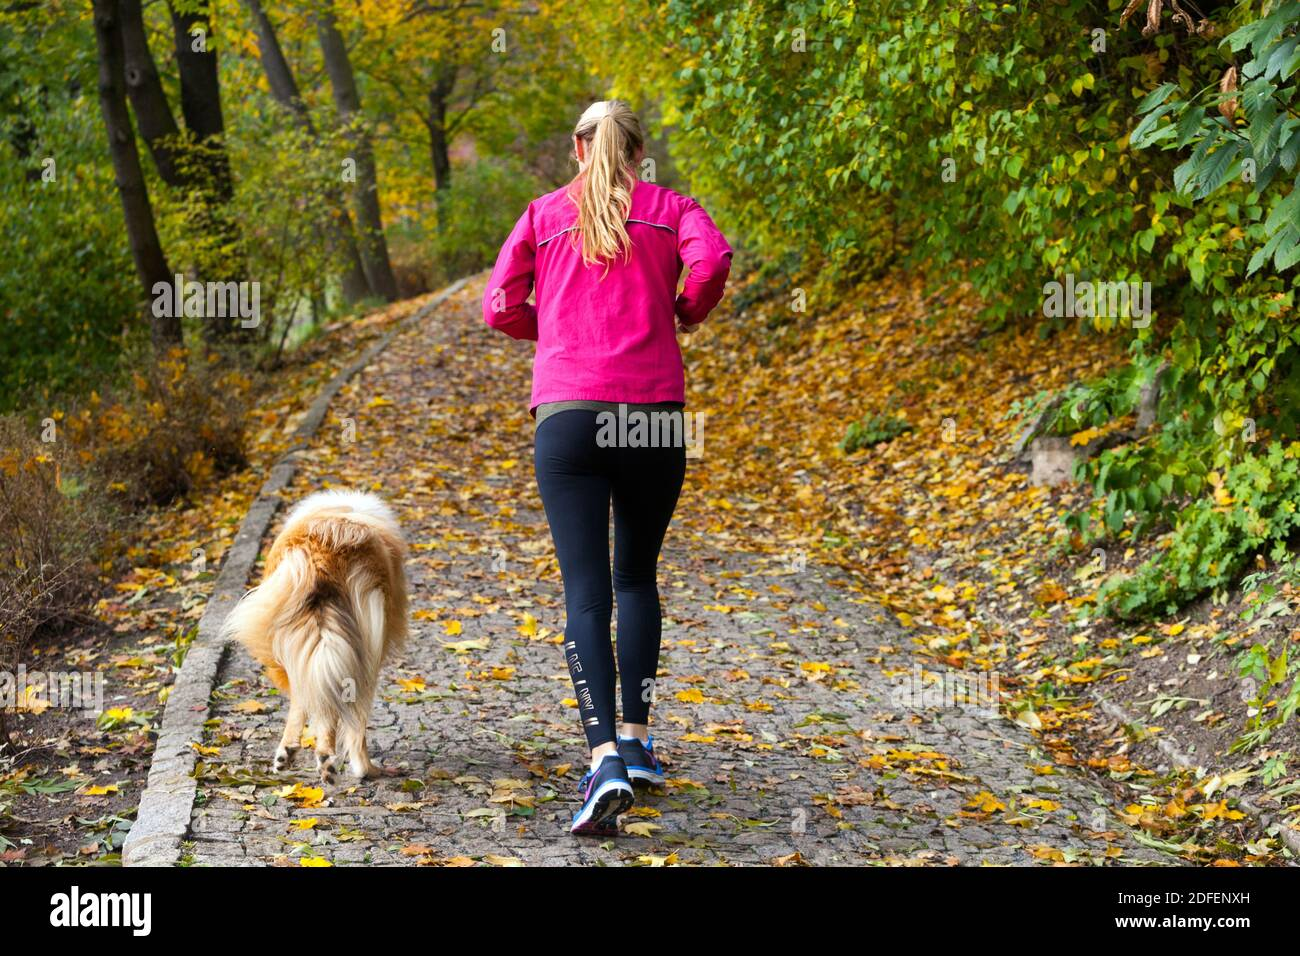

1/1 [==============================] - 0s 77ms/step
The probabilities of the input image belonging to the two classes are: [[-4.4978247  2.6182444]]
The predicted label is: 1
The image represents a Dog


In [49]:

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print('The probabilities of the input image belonging to the two classes are:', input_prediction)

input_pred_label = np.argmax(input_prediction)

print('The predicted label is:', input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')